In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Read the Image
image = cv2.imread("/content/useimg.png")

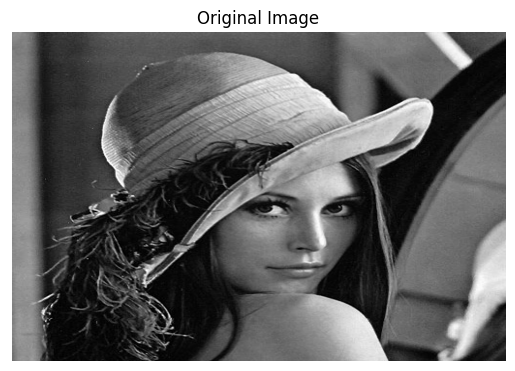

In [7]:
# 2. Display the Image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

In [9]:
# 3. Extract Image Size
height, width, channels = image.shape
print(f"Image Dimensions: Width = {width}, Height = {height}, Channels = {channels}")
# 4. Calculate Total Image Pixels
total_pixels = height * width
print(f"Total Number of Pixels: {total_pixels}")

Image Dimensions: Width = 497, Height = 330, Channels = 3
Total Number of Pixels: 164010


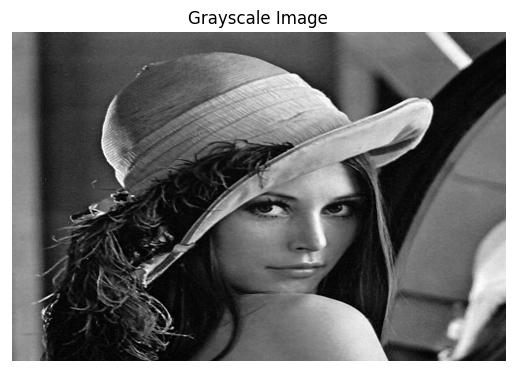

In [10]:
# 5. Convert BGR to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)

# Display Grayscale Image
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


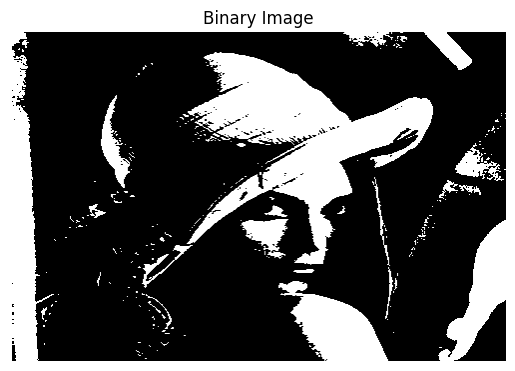

Number of Black Pixels: 123963
Size of Image (Pixels): 164010


In [11]:
# 6. Convert Grayscale to Binary using Threshold
threshold_value = 127
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)

# Display Binary Image
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

# 6.i Count Black Pixels in Binary Image
black_pixels = np.sum(binary_image == 0)
print(f"Number of Black Pixels: {black_pixels}")
print(f"Size of Image (Pixels): {total_pixels}")

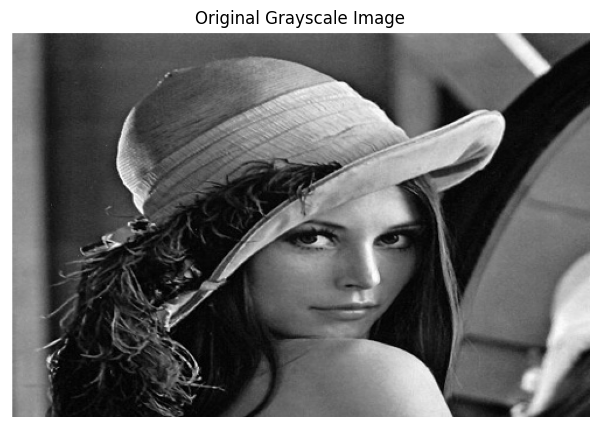

In [12]:
# Load the image in grayscale
image = cv2.imread("gray_image.jpg", cv2.IMREAD_GRAYSCALE)

# Display the original grayscale image
plt.figure(figsize=(10,5))
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

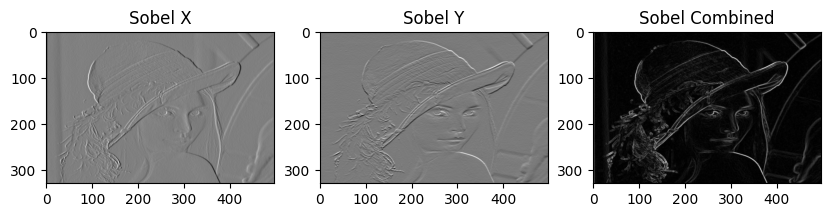

In [13]:
# 1. EDGE DETECTION

# i. Sobel Operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title("Sobel X")
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title("Sobel Y")
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title("Sobel Combined")
plt.show()

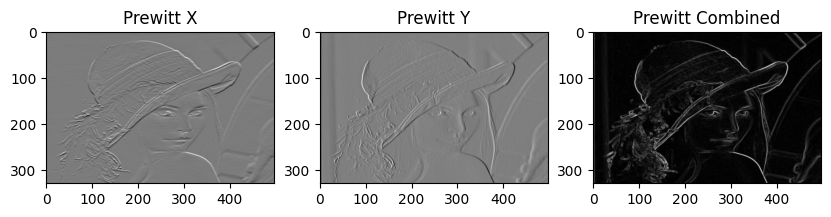

In [15]:
from skimage.filters import prewitt, roberts
# ii. Prewitt Operator
prewitt_x = prewitt(image, axis=0)
prewitt_y = prewitt(image, axis=1)
prewitt_combined = np.hypot(prewitt_x, prewitt_y)

plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1), plt.imshow(prewitt_x, cmap='gray'), plt.title("Prewitt X")
plt.subplot(1, 3, 2), plt.imshow(prewitt_y, cmap='gray'), plt.title("Prewitt Y")
plt.subplot(1, 3, 3), plt.imshow(prewitt_combined, cmap='gray'), plt.title("Prewitt Combined")
plt.show()

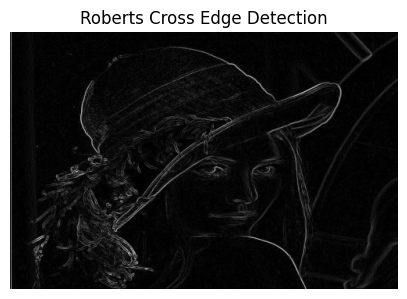

In [16]:
# iii. Roberts Cross Operator
roberts_edges = roberts(image)

plt.figure(figsize=(5,5))
plt.imshow(roberts_edges, cmap='gray')
plt.title("Roberts Cross Edge Detection")
plt.axis("off")
plt.show()

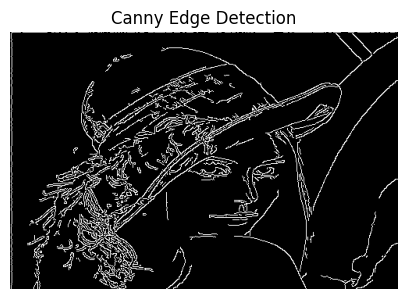

In [17]:
# iv. Canny Edge Detector
canny_edges = cv2.Canny(image, 100, 200)

plt.figure(figsize=(5,5))
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

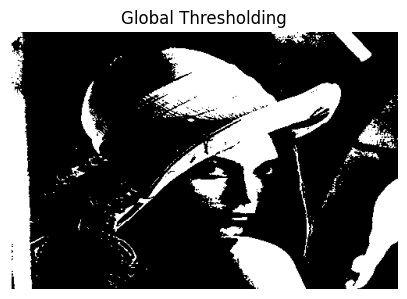

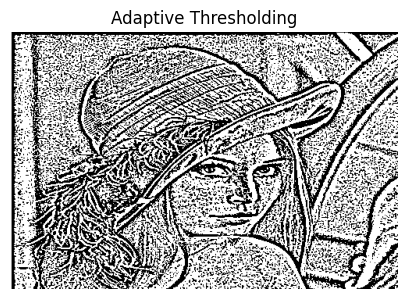

In [18]:
# 2. IMAGE SEGMENTATION

# i. Global Thresholding
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding")
plt.axis("off")
plt.show()

# ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(5,5))
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis("off")
plt.show()

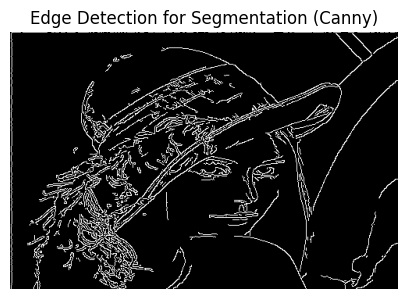

In [21]:
# iii. Edge Detection for Segmentation (Canny)
plt.figure(figsize=(5,5))
plt.imshow(canny_edges, cmap='gray')
plt.title("Edge Detection for Segmentation (Canny)")
plt.axis("off")
plt.show()

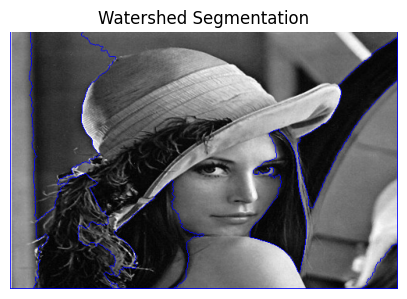

In [22]:
# iv. Region-Based Segmentation (Watershed Algorithm)
image_color = cv2.imread("/content/gray_image.jpg")  # Load in color
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Apply Otsu's Thresholding
_, binary_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove noise via morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(binary_thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Identify background and foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Identify unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)# Apply Watershed Algorithm
markers = cv2.connectedComponents(sure_fg)[1]
markers += 1
markers[unknown == 255] = 0
cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Display Watershed Segmented Image
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis("off")
plt.show()